In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, date, time, timedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base= automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
session.query(Station).first().__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x213a9301940>,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'id': 1,
 'latitude': 21.2716,
 'elevation': 3.0}

In [10]:
session.query(Measurement).first().__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x213a932ac10>,
 'prcp': 0.08,
 'id': 1,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01'}

# Exploratory Precipitation Analysis

In [23]:
# Find the most recent date in the data set.
Recent1=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f'The most recent data point listed was on {Recent1}')

The most recent data point listed was on ('2017-08-23',)


In [24]:
# Find the oldest date in the data set.
Oldest1=session.query(Measurement.date).order_by(Measurement.date).first()
print(f'The oldest data point listed was on {Oldest1}')

The oldest data point listed was on ('2010-01-01',)


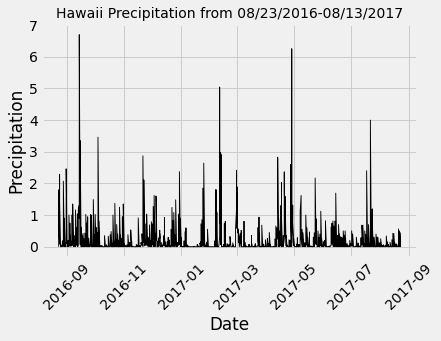

In [87]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
date_precipitation = dt.date (2017,8,23) - dt.timedelta(days = 365)
#date_precipitation
# Perform a query to retrieve the data and precipitation scores
query1 = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= date_precipitation).order_by(Measurement.date.asc()).all

#query1()
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df1 = pd.DataFrame(query1())
precipitation_df1.columns = ["Date", "Precipitation"]
precipitation_df1
precipitation_df2 = precipitation_df1.set_index('Date')
precipitation_df2
precipitation_df3 = precipitation_df2.dropna()
precipitation_df3
precipitation_df3.index= pd.to_datetime(precipitation_df3.index)
precipitation_df3
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(precipitation_df3.index, precipitation_df3['Precipitation'],color="black", linewidth=.9)
plt.title("Hawaii Precipitation from 08/23/2016-08/13/2017", fontsize = 14)
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.show()

In [88]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df3.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset


In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [19]:
# Close Session
session.close()